# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
* Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [4]:
#Your code here
df = pd.read_csv('nashville-meetup/group-edges.csv', index_col=0)
df.head()

,group1,group2,weight
0,19292162,535553,2
1,19292162,19194894,1
2,19292162,19728145,1
3,19292162,18850080,2
4,19292162,1728035,1


To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [7]:
#Your code here
descriptions_df = pd.read_csv('nashville-meetup/meta-groups.csv',index=)
descriptions_df.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville


## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [16]:
group_names = dict(zip(descriptions_df.group_id, descriptions_df.group_name))
group_names[339011]

'Nashville Hiking Meetup'

In [18]:
#Your code here
G = nx.Graph()
for row in df.index:
    group1 = group_names[df.group1[row]]
    group2 = group_names[df.group2[row]]
    weight = df.weight[row]
    G.add_edge(group1,group2,weight=weight)

## Visualize the Network

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


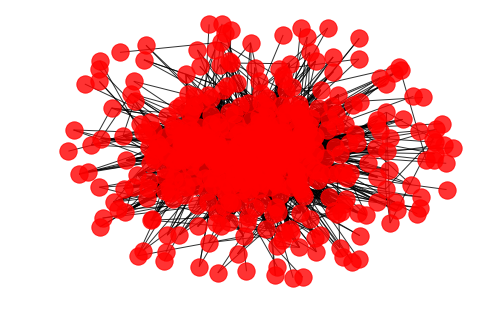

In [23]:
#Your code here
pos=nx.spring_layout(G, k=0.5)
nx.draw(G,pos=pos,with_labels=False, alpha=0.8)

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [33]:
df.weight.describe()

count    6692.000000
mean        2.301853
std         4.089973
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        91.000000
Name: weight, dtype: float64

In [35]:
for i in range(50,100,5):
    print("{}th percentile: {}".format(i,df.weight.quantile(q=i/100)))

50th percentile: 1.0
55th percentile: 1.0
60th percentile: 1.0
65th percentile: 1.0
70th percentile: 2.0
75th percentile: 2.0
80th percentile: 2.0
85th percentile: 3.0
90th percentile: 4.0
95th percentile: 7.0


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


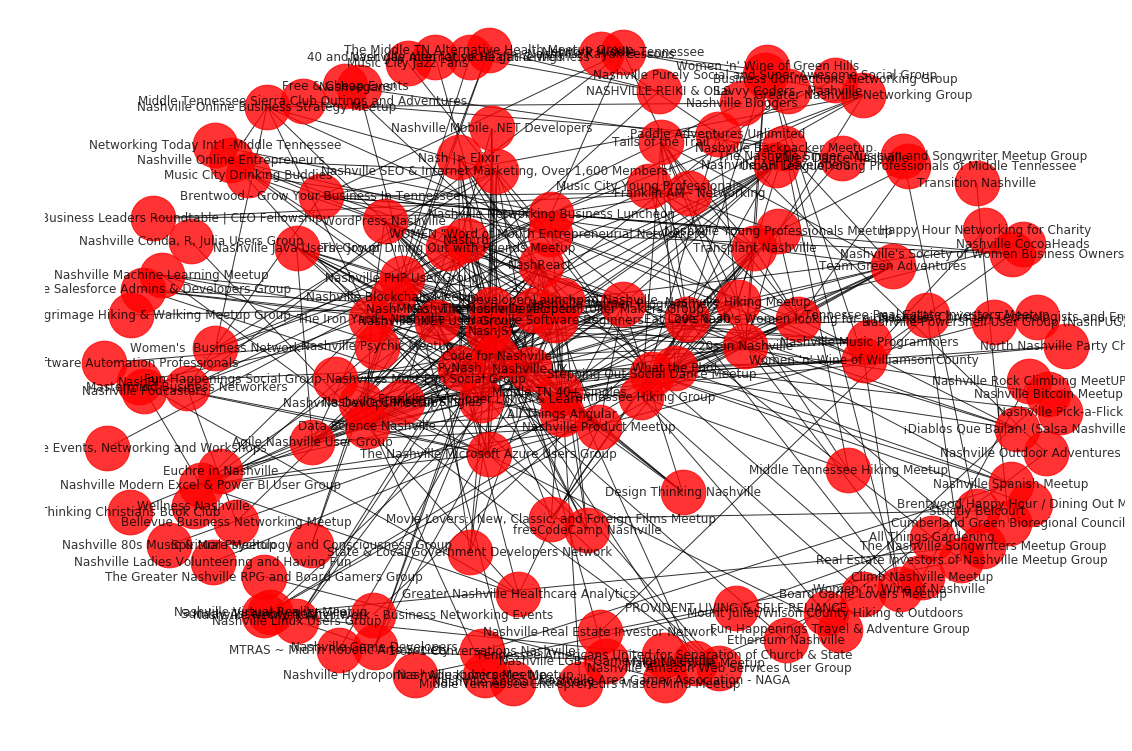

In [32]:
#Your code here
threshold = 5
G = nx.Graph()
for row in df.index:
    group1 = group_names[df.group1[row]]
    group2 = group_names[df.group2[row]]
    weight = df.weight[row]
    if weight > threshold:
        G.add_edge(group1,group2,weight=weight)


plt.figure(figsize=(15,10))
pos=nx.spring_layout(G, k=2)
nx.draw(G, pos=pos, alpha=.8,
        node_size=2000,
        with_labels=True)

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [37]:
#Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G))
for n, clusters in enumerate(gn_clusters):
    print(f"{n} edges removed: {len(clusters)} clusters.")

0 edges removed: 7 clusters.
1 edges removed: 8 clusters.
2 edges removed: 9 clusters.
3 edges removed: 10 clusters.
4 edges removed: 11 clusters.
5 edges removed: 12 clusters.
6 edges removed: 13 clusters.
7 edges removed: 14 clusters.
8 edges removed: 15 clusters.
9 edges removed: 16 clusters.
10 edges removed: 17 clusters.
11 edges removed: 18 clusters.
12 edges removed: 19 clusters.
13 edges removed: 20 clusters.
14 edges removed: 21 clusters.
15 edges removed: 22 clusters.
16 edges removed: 23 clusters.
17 edges removed: 24 clusters.
18 edges removed: 25 clusters.
19 edges removed: 26 clusters.
20 edges removed: 27 clusters.
21 edges removed: 28 clusters.
22 edges removed: 29 clusters.
23 edges removed: 30 clusters.
24 edges removed: 31 clusters.
25 edges removed: 32 clusters.
26 edges removed: 33 clusters.
27 edges removed: 34 clusters.
28 edges removed: 35 clusters.
29 edges removed: 36 clusters.
30 edges removed: 37 clusters.
31 edges removed: 38 clusters.
32 edges removed: 39 

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

In [38]:
colors = []
for i in range(20):
    colors.append('#%06X' % np.random.randint(0,0xFFFFFF))

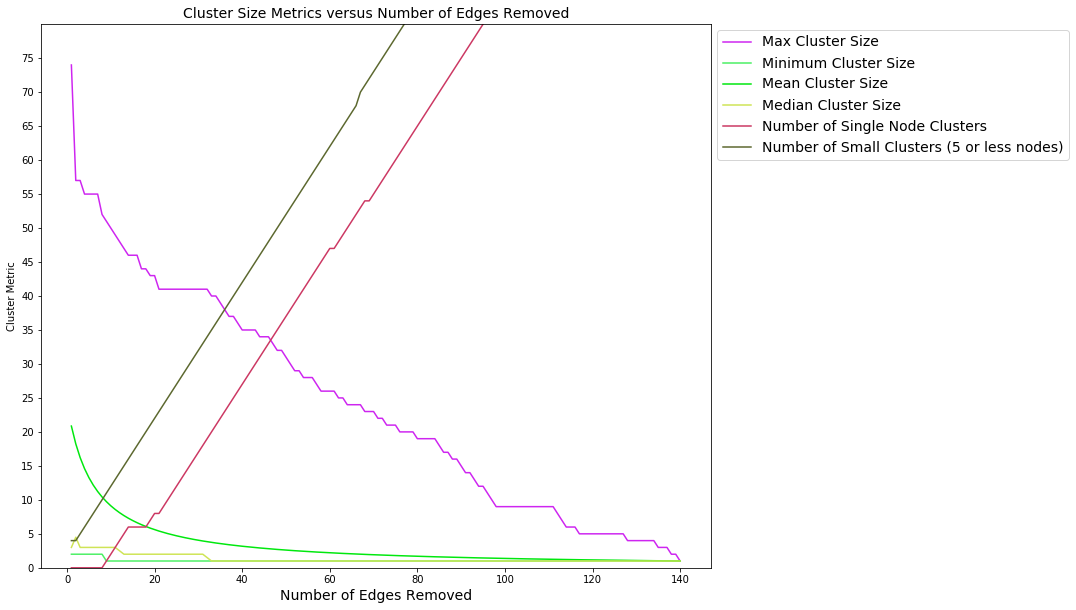

In [40]:
#Your code here
fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

In [49]:
def plot_girvan_newman(G, clusters):
    num_clusters = len(clusters)
    print("Number of clusters: ",num_clusters)

    #GENERATE RANDOM COLORS
    colors = []
    for i in range(num_clusters):
        colors.append('#%06X' % np.random.randint(0,0xFFFFFF))

    #PLOT THE GRAPH WITH CLIQUES
    fig = plt.figure(figsize=(15,10))
    for n, ci in enumerate(clusters):
        ci = G.subgraph(ci)
        nx.draw(ci, pos=nx.spring_layout(G, k=0.6, seed=10), with_labels=True, node_size=2000,alpha=0.75,
            node_color=colors[n]);
    plt.show()

Number of clusters:  22


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


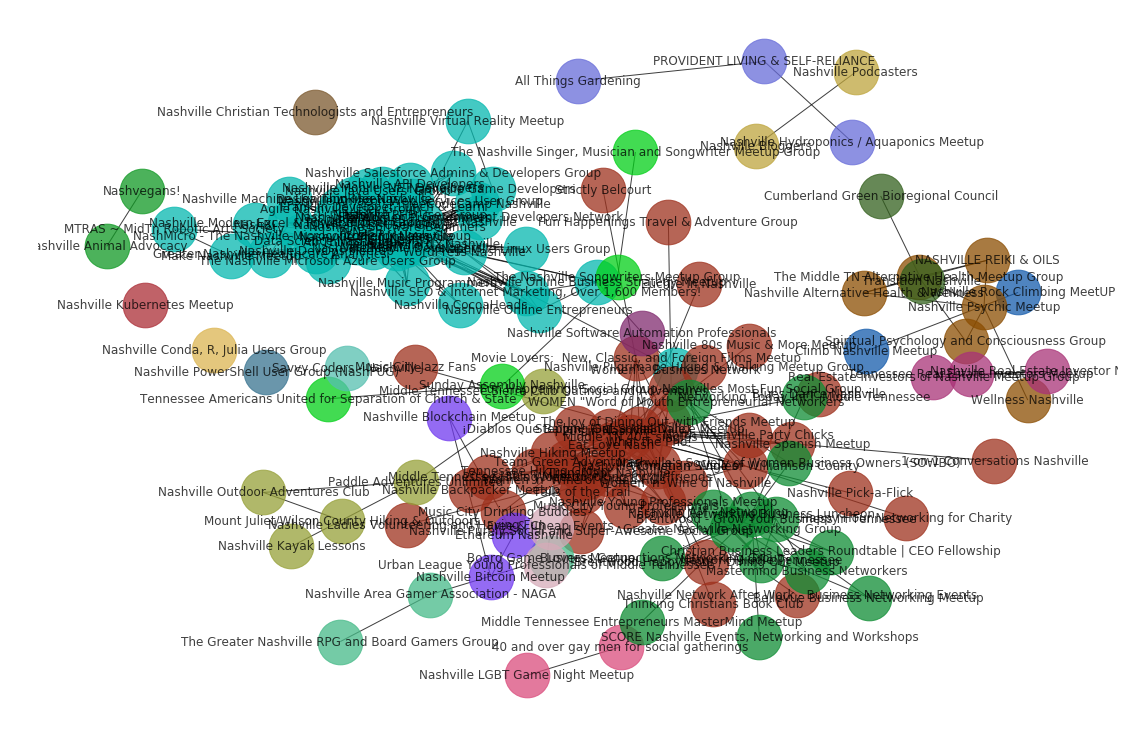

In [50]:
plot_girvan_newman(G,gn_clusters[15])

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               